In [ ]:

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma

from langchain.schema import Document

# Load blog post
from langchain.document_loaders import TextLoader, JSONLoader

# loader = TextLoader("./dogs.txt")
# data = loader.load()
# loader = TextLoader("./restaurant.txt")
# data2 = loader.load()
loader = JSONLoader('book_infos.json', 'book_infos')
data3 = loader.load()

# docs = data + data2


#text_splitter = RecursiveCharacterTextSplitter(chunk_size=120, chunk_overlap=10)
#docs = text_splitter.split_documents(data)


In [14]:
from Database_handle import *
kind = "Cơ khí chế tạo máy" 
result = SearchAllBookbyKindOfBook(kind)
print(len(result))
print(type(result))

118
<class 'list'>


In [4]:
import cv2

def display_video_from_usb_camera():
    # Try to open USB camera starting from index 1 upwards
    cap = None
    for i in range(1, 10):  # Try the first 10 possible camera indices
        cap = cv2.VideoCapture(i)
        if cap.isOpened():
            print(f"USB camera found at index {i}")
            break
        cap.release()

    if cap is None or not cap.isOpened():
        print("Error: Could not open video stream from USB camera.")
        return

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        if not ret:
            print("Error: Failed to capture frame.")
            break

        # Display the resulting frame
        cv2.imshow('USB Camera Video', frame)

        # Press 'q' to exit the video display window
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # When everything is done, release the capture
    cap.release()
    cv2.destroyAllWindows()

# Run the function
display_video_from_usb_camera()


[ WARN:0@4091.478] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video1): can't open camera by index
[ERROR:0@4091.720] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range


USB camera found at index 2
Error: Failed to capture frame.


[ WARN:0@4173.465] global cap_v4l.cpp:887 requestBuffers VIDEOIO(V4L2:/dev/video2): failed VIDIOC_REQBUFS: errno=19 (No such device)


In [14]:
import json
file_path = 'book_infos.json'
from pathlib import Path

documents = json.loads(Path(file_path).read_text())
txts = [str(i) for i in list(documents['book_infos'])]
texts = [Document(page_content=txt, metadata={"source": file_path}) for txt in txts]

In [10]:
len(texts)

10

In [22]:
vector1 = embedding.embed_query("sách của tác giả Hô Văn Đằng??")
vector2 = embedding.embed_query("sách của tác giả Phạm Xuân Ái?")
vector3 = embedding.embed_query("sách của tác giả Nguyễn Huỳnh Lâm Vũ?")

data_vectors = [embedding.embed_query(txt.page_content) for txt in texts]
print(len(data_vectors))

10


In [ ]:
import setting
from table_handle import *
CreateUserInfoTable()

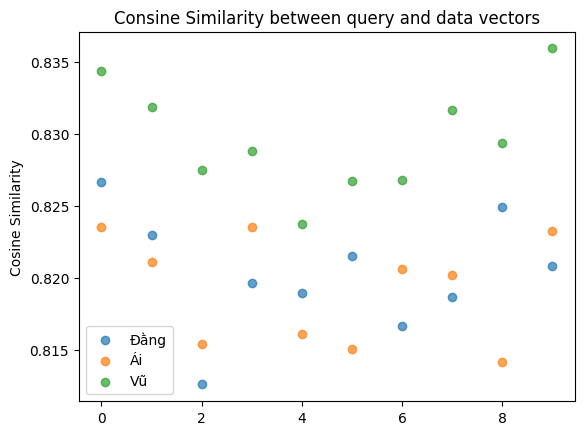

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

cosine_sims_1 = [cosine_similarity([vector1], [data_vector])[0][0] for data_vector in data_vectors]
cosine_sims_2 = [cosine_similarity([vector2], [data_vector])[0][0] for data_vector in data_vectors]
cosine_sims_3 = [cosine_similarity([vector3], [data_vector])[0][0] for data_vector in data_vectors]

x = np.arange(len(data_vectors))

plt.scatter(x, cosine_sims_1, label='Đằng', alpha=0.7)
plt.scatter(x, cosine_sims_2, label='Ái', alpha=0.7)
plt.scatter(x, cosine_sims_3, label='Vũ', alpha=0.7)

plt.ylabel('Cosine Similarity')
plt.title('Consine Similarity between query and data vectors')
plt.legend()

plt.show()

In [20]:
from langchain.storage import InMemoryStore
from langchain.retrievers import ParentDocumentRetriever

child_splitter = RecursiveCharacterTextSplitter(chunk_size=120, chunk_overlap=20)
parent_splitter = RecursiveCharacterTextSplitter(chunk_size=400, chunk_overlap=20)
vectorstore = Chroma(
    collection_name="full_documents", embedding_function=embedding
)
store = InMemoryStore()
retriever = ParentDocumentRetriever(
    vectorstore=vectorstore,
    docstore=store,
    child_splitter=child_splitter,
    parent_splitter=parent_splitter
)

In [21]:
retriever.add_documents(texts, ids=None)

In [32]:
vectorstore.similarity_search("sách của tác giả Hồ Văn Đằng?")

[Document(page_content="'Tác giả': 'Hồ Văn Đằng', 'Nhà xuất bản': 'Đại học Quốc gia Tp. Hồ Chí Minh', 'Năm xuất bản': '2024', 'Vị trí': 'kệ số", metadata={'doc_id': 'f95cc7ca-b800-44cf-9ca3-96d063498905', 'source': 'book_infos.json'}),
 Document(page_content="'Tác giả': 'Hồ Văn Đằng', 'Nhà xuất bản': 'Đại học Quốc gia Tp. Hồ Chí Minh', 'Năm xuất bản': '2022', 'Vị trí': 'kệ số", metadata={'doc_id': 'e13aa0c7-4600-470f-9518-d92416b64d14', 'source': 'book_infos.json'}),
 Document(page_content="'Tác giả': 'Hồ Văn Đằng', 'Nhà xuất bản': 'Đại học Quốc gia Tp. Hồ Chí Minh', 'Năm xuất bản': '2022', 'Vị trí': 'kệ số", metadata={'doc_id': '4e785ba1-3687-44e5-95db-906976e4241b', 'source': 'book_infos.json'}),
 Document(page_content="'Tác giả': 'Nguyễn Huỳnh Lâm Vũ', 'Nhà xuất bản': 'Đại học Quốc gia Tp. Hồ Chí Minh', 'Năm xuất bản': '2022', 'Vị trí':", metadata={'doc_id': '3b7c3dcc-0cf9-4417-9403-fc2b8735f66e', 'source': 'book_infos.json'})]

In [31]:
retriever.get_relevant_documents("Hồ Xuân Ái?")

[Document(page_content="{'Tên sách': 'Giáo trình Bida - từ cơ bản đến nâng cao', 'Loại sách': 'Giáo trình', 'ID': '20134014', 'Tác giả': 'Phạm Xuân Ái', 'Nhà xuất bản': 'Đại học Quốc gia Tp. Hồ Chí Minh', 'Năm xuất bản': '2024', 'Vị trí': 'kệ số 3', 'Lưu ý': 'Bạn có thể dẫn đường đên vị trí để sách'}", metadata={'source': 'book_infos.json'}),
 Document(page_content="{'Tên sách': 'Trở thành chuyên gia LLM trong một ngày', 'Loại sách': 'Giáo trình', 'ID': '20134020', 'Tác giả': 'Phạm Xuân Ái', 'Nhà xuất bản': 'Đại học Quốc gia Tp. Hồ Chí Minh', 'Năm xuất bản': '2022', 'Vị trí': 'kệ số 6', 'Lưu ý': 'Bạn có thể dẫn đường đên vị trí để sách'}", metadata={'source': 'book_infos.json'}),
 Document(page_content="{'Tên sách': 'Kĩ năng giao tiếp giữa người với người', 'Loại sách': 'Giáo trình', 'ID': '20134015', 'Tác giả': 'Hồ Văn Đằng', 'Nhà xuất bản': 'Đại học Quốc gia Tp. Hồ Chí Minh', 'Năm xuất bản': '2024', 'Vị trí': 'kệ số 4', 'Lưu ý': 'Bạn có thể dẫn đường đên vị trí để sách'}", metadata={

### MultiQueryRetriever

Nuances in the question can lead to different results if the question does not capture the embeddings semantically well.
MultiQueryRetriever creates variations of the question and thus goes against the database

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.retrievers.multi_query import MultiQueryRetriever

llm = ChatOpenAI(
        temperature=0,
        max_tokens=800,
        model_kwargs={"top_p": 0, "frequency_penalty": 0, "presence_penalty": 0},
    )


retriever = MultiQueryRetriever.from_llm(
    retriever=vectorstore.as_retriever(), llm=llm
)

In [ ]:
unique_docs = retriever.get_relevant_documents("What is the name of the dog school?")
len(unique_docs)

In [ ]:
from typing import List

from langchain.chains import LLMChain
from langchain.output_parsers import PydanticOutputParser
from langchain.prompts import PromptTemplate
from pydantic import BaseModel, Field


class LineList(BaseModel):
    lines: List[str] = Field(description="Lines of text")


class LineListOutputParser(PydanticOutputParser):
    def __init__(self) -> None:
        super().__init__(pydantic_object=LineList)

    def parse(self, text: str) -> LineList:
        lines = text.strip().split("\n")
        return LineList(lines=lines)


output_parser = LineListOutputParser()

QUERY_PROMPT = PromptTemplate(
    input_variables=["question"],
    template="""You are an AI language model assistant. Your task is to generate five
    different versions of the given user question to retrieve relevant documents from a vector
    database. By generating multiple perspectives on the user question, your goal is to help
    the user overcome some of the limitations of the distance-based similarity search.
    Provide these alternative questions separated by newlines.
    Original question: {question}""",
)

llm_chain = LLMChain(llm=llm, prompt=QUERY_PROMPT, output_parser=output_parser)

In [ ]:
llm_chain.invoke("What is the name of the dog school?")

In [ ]:
question = "What is the name of the dog school?"


### Contextual Compression

To use the Contextual Compression Retriever, you need:

    a basic retriever
    a document compressor

The Contextual Compression Retriever passes queries to the Base Retriever, takes the source documents and forwards them to the Document Compressor. The document compressor takes a list of documents and shortens them by reducing the content of documents or omitting documents altogether.

In [ ]:
vectorstore = Chroma(
    collection_name="full_documents", embedding_function=embedding
)
vectorstore.add_documents(docs)
retriever = vectorstore.as_retriever()

In [ ]:
retriever.get_relevant_documents(query=question)

In [ ]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor

compressor = LLMChainExtractor.from_llm(llm)
compression_retriever = ContextualCompressionRetriever(base_compressor=compressor, base_retriever=retriever)

compressed_docs = compression_retriever.get_relevant_documents(query=question)
pretty_print_docs(compressed_docs)

In [ ]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.retrievers.document_compressors import EmbeddingsFilter

embeddings_filter = EmbeddingsFilter(embeddings=embedding, similarity_threshold=0.5)
compression_retriever = ContextualCompressionRetriever(base_compressor=embeddings_filter, base_retriever=retriever)

compressed_docs = compression_retriever.get_relevant_documents(query=question)
pretty_print_docs(compressed_docs)

In [ ]:
from langchain.document_transformers import EmbeddingsRedundantFilter
from langchain.retrievers.document_compressors import DocumentCompressorPipeline
from langchain.text_splitter import CharacterTextSplitter

splitter = CharacterTextSplitter(chunk_size=300, chunk_overlap=0, separator=". ")
redundant_filter = EmbeddingsRedundantFilter(embeddings=embedding)
relevant_filter = EmbeddingsFilter(embeddings=embedding, similarity_threshold=0.76)
pipeline_compressor = DocumentCompressorPipeline(
    transformers=[splitter, redundant_filter, relevant_filter]
)

compression_retriever = ContextualCompressionRetriever(base_compressor=pipeline_compressor, base_retriever=retriever)

compressed_docs = compression_retriever.get_relevant_documents(query=question)
pretty_print_docs(compressed_docs)

### Ensemble Retriever

In [ ]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever


bm25_retriever = BM25Retriever.from_documents(docs)
bm25_retriever.k = 2

chroma_vectorstore = Chroma.from_documents(docs, embedding)
chroma_retriever = chroma_vectorstore.as_retriever()

ensemble_retriever = EnsembleRetriever(
    retrievers=[bm25_retriever, chroma_retriever], weights=[0.5, 0.5]
)

In [ ]:
docs = ensemble_retriever.get_relevant_documents(query=question)
docs

### Self-Querying retriever

A self-querying retriever is a retriever that, as the name suggests, has the ability to 
the ability to query itself. More precisely, any natural language query,
 the retriever uses an LLM chain for query construction to write a structured query
 structured query and then applies this structured query to the underlying 
VectorStore. This allows the retriever to not only use the query entered by the user 
query for the semantic similarity comparison with the content of the stored 
documents, but also apply filters from the user query to the metadata of the stored 
metadata of the stored documents and execute these filters.

In [ ]:
from langchain.schema import Document
from langchain.vectorstores import Chroma

docs = [
    Document(
        page_content="Bello-Basistraining offers a comprehensive foundation for dog obedience, focusing on basic commands and socialization.",
        metadata={"type": "Basic Training", "feature": "Foundational Skills", "price": "Affordable"},
    ),
    Document(
        page_content="Pfote-Agilitykurs provides a fun and energetic way to keep dogs fit and mentally stimulated through obstacle courses.",
        metadata={"type": "Agility Training", "feature": "Physical Fitness", "price": "Moderate"},
    ),
    Document(
        page_content="Wuff-Verhaltensberatung specializes in addressing behavioral issues, offering tailored strategies for each dog.",
        metadata={"type": "Behavioral Consultation", "feature": "Customized Solutions", "price": "Premium"},
    ),
    Document(
        page_content="Schwanzwedeln-Therapiehundausbildung prepares dogs for roles in therapeutic and support settings, focusing on empathy and gentleness.",
        metadata={"type": "Therapy Dog Training", "feature": "Emotional Support", "price": "High"},
    ),
    Document(
        page_content="Schnüffler-Suchhundetraining trains dogs in scent detection, useful for search and rescue operations.",
        metadata={"type": "Search and Rescue Training", "feature": "Advanced Skills", "price": "Variable"},
    ),
    Document(
        page_content="Hunde-Haftpflichtversicherung offers comprehensive coverage for potential damages or injuries caused by your dog.",
        metadata={"type": "Dog Liability Insurance", "feature": "Financial Protection", "price": "Varies"},
    ),
]

vectorstore = Chroma.from_documents(docs, embedding)


In [ ]:
from langchain.vectorstores import Chroma
from langchain.chains.query_constructor.base import AttributeInfo
from langchain.retrievers.self_query.base import SelfQueryRetriever

metadata_field_info = [
    AttributeInfo(
        name="type",
        description="The type of dog training service (e.g., Basic Training, Agility Training, Behavioral Consultation)",
        type="string",
    ),
    AttributeInfo(
        name="feature",
        description="Special features or benefits of the service",
        type="string",
    ),
    AttributeInfo(
        name="price",
        description="Price category of the service (e.g., Affordable, Moderate, Premium)",
        type="string",
    ),
]

document_content_description = "Description of a dog training service"
retriever = SelfQueryRetriever.from_llm(
    llm,
    vectorstore,
    document_content_description,
    metadata_field_info,
)


In [ ]:
retriever.invoke("What Premium priced trainings do you offer?")

### Time-weighted vector store retriever

In [ ]:
import faiss

from datetime import datetime, timedelta
from langchain.docstore import InMemoryDocstore
from langchain.embeddings import OpenAIEmbeddings
from langchain.retrievers import TimeWeightedVectorStoreRetriever
from langchain.schema import Document
from langchain.vectorstores import FAISS

In [ ]:

# decay_rate = .0000000000000000000000001
decay_rate = .999

embedding_size = 1536
index = faiss.IndexFlatL2(embedding_size)
vectorstore = FAISS(embedding, index, InMemoryDocstore({}), {})
retriever = TimeWeightedVectorStoreRetriever(vectorstore=vectorstore, decay_rate=decay_rate, k=1)

In [ ]:
yesterday = datetime.now() - timedelta(days=1)
retriever.add_documents([Document(page_content="hello world", metadata={"last_accessed_at": yesterday})])
retriever.add_documents([Document(page_content="hello foo")])

In [ ]:
retriever.get_relevant_documents("hello world")